In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def fip_score(data):
    # Calculating the pct_change for the fip calculation
    
    data = data.pct_change().dropna()

    # set variables for the number of 
    # positive / negative / zero and number of data. 
    # Determine the cumulativ returns and set to a variable. 

    num_positive = len(data[data > 0])
    num_negative = len(data[data < 0])
    num_zero = len(data[data == 0])
    num_days = len(data)
    cum_returns = data.sum() 
        
    # Perform the Fip Score calculation

    score = (np.sign(cum_returns) * 
                 (num_negative / num_days - 
                  num_positive / num_days))
    return score

In [3]:
df = pd.read_csv('crude_wti_futures_history_data.csv',
                parse_dates = True,
                infer_datetime_format = True,
                index_col = 'Date')

In [4]:
df = df.sort_index()
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2001-09-24,22.01,25.90,25.90,21.80,108.96K,-15.25%
2001-09-25,21.81,22.15,23.15,21.25,90.61K,-0.91%
2001-09-26,22.38,22.17,22.50,20.30,82.37K,2.61%
2001-09-27,22.74,22.71,22.94,21.95,56.83K,1.61%
2001-09-28,23.43,22.76,23.52,22.76,60.08K,3.03%
...,...,...,...,...,...,...
2020-09-16,40.16,38.35,40.34,38.35,367.61K,4.91%
2020-09-17,40.97,40.19,41.22,39.42,280.67K,2.02%
2020-09-18,41.11,40.97,41.49,40.30,73.76K,0.34%


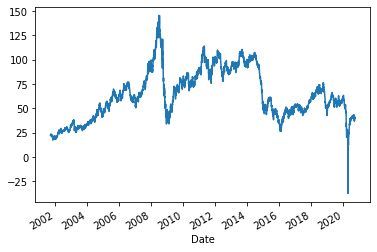

In [5]:
df['Price'].plot()

In [8]:
weekly_average = df.resample('W').mean()

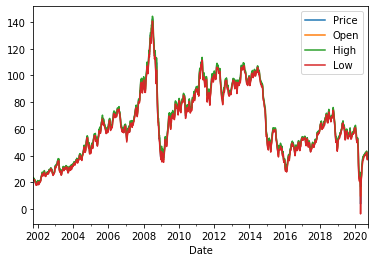

In [9]:
weekly_average.plot()

In [10]:
oil_df = weekly_average[['Price']]
oil_df

,Price
Date,
2001-09-30,22.474000
2001-10-07,22.634000
2001-10-14,22.660000
2001-10-21,21.848000
2001-10-28,21.996000
...,...
2020-08-30,43.074000
2020-09-06,41.128333
2020-09-13,37.728000


In [11]:
window_size = 26

In [12]:
oil_df['fip'] = df['Price'].rolling(window_size).apply(fip_score)

/Users/liwei2/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
oil_df = oil_df.fillna(0)
oil_df

,Price,fip
Date,,
2001-09-30,22.474000,0.00
2001-10-07,22.634000,0.00
2001-10-14,22.660000,0.00
2001-10-21,21.848000,0.00
2001-10-28,21.996000,0.00
...,...,...
2020-08-30,43.074000,0.00
2020-09-06,41.128333,-0.16
2020-09-13,37.728000,0.00


In [14]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, 
# but it is good practice to comment this out and 
# run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [15]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [16]:
# Define the window size
#window_size = 30

# Set the index of the feature and target columns
feature_column = 0
target_column = 0

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(oil_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[22.474  22.634  22.66   21.848  21.996  21.154  20.684  19.618  18.61
  19.09   19.362  18.432  19.456  20.86   20.71   20.594  18.524  19.3825
  19.714  19.964  21.21   20.7975 21.464  23.264  24.348  25.17  ]
 [22.634  22.66   21.848  21.996  21.154  20.684  19.618  18.61   19.09
  19.362  18.432  19.456  20.86   20.71   20.594  18.524  19.3825 19.714
  19.964  21.21   20.7975 21.464  23.264  24.348  25.17   25.6325]
 [22.66   21.848  21.996  21.154  20.684  19.618  18.61   19.09   19.362
  18.432  19.456  20.86   20.71   20.594  18.524  19.3825 19.714  19.964
  21.21   20.7975 21.464  23.264  24.348  25.17   25.6325 26.988 ]] 

y sample values:
[[25.6325]
 [26.988 ]
 [25.39  ]]


In [17]:
x_a = np.array([oil_df['fip'][window_size:len(oil_df)-1]]).T

In [18]:
X_a = np.append(X, x_a, axis=1)

In [19]:

# Print a few sample values from X and y
print (f"X sample values:\n{X_a[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[22.474  22.634  22.66   21.848  21.996  21.154  20.684  19.618  18.61
  19.09   19.362  18.432  19.456  20.86   20.71   20.594  18.524  19.3825
  19.714  19.964  21.21   20.7975 21.464  23.264  24.348  25.17    0.    ]
 [22.634  22.66   21.848  21.996  21.154  20.684  19.618  18.61   19.09
  19.362  18.432  19.456  20.86   20.71   20.594  18.524  19.3825 19.714
  19.964  21.21   20.7975 21.464  23.264  24.348  25.17   25.6325  0.    ]
 [22.66   21.848  21.996  21.154  20.684  19.618  18.61   19.09   19.362
  18.432  19.456  20.86   20.71   20.594  18.524  19.3825 19.714  19.964
  21.21   20.7975 21.464  23.264  24.348  25.17   25.6325 26.988   0.    ]] 

y sample values:
[[25.6325]
 [26.988 ]
 [25.39  ]]


In [20]:
X = X_a

In [21]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X_a[: split - 1]
X_test = X_a[split:]

y_train = y[: split - 1]
y_test = y[split:]

#### Scale Data with `MinMaxScaler`

Before training the RNN LSTM model, use the `MinMaxScaler` from `sklearn` to scale the training and testing data between `0` and `1`.

**Note:** You need to scale both features and target sets.

In [22]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [23]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.03259007]
  [0.03388013]
  [0.03408976]
  [0.02754272]
  [0.02873603]
  [0.12439953]
  [0.12100695]
  [0.11331228]
  [0.10603627]
  [0.10950104]
  [0.1114644 ]
  [0.10475142]
  [0.11214292]
  [0.12227736]
  [0.12119462]
  [0.1203573 ]
  [0.1054155 ]
  [0.11161238]
  [0.11400523]
  [0.1158098 ]
  [0.12480375]
  [0.12182622]
  [0.12663719]
  [0.13963006]
  [0.14745466]
  [0.15338807]
  [0.55      ]]

 [[0.03388013]
  [0.03408976]
  [0.02754272]
  [0.02873603]
  [0.0219471 ]
  [0.12100695]
  [0.11331228]
  [0.10603627]
  [0.10950104]
  [0.1114644 ]
  [0.10475142]
  [0.11214292]
  [0.12227736]
  [0.12119462]
  [0.1203573 ]
  [0.1054155 ]
  [0.11161238]
  [0.11400523]
  [0.1158098 ]
  [0.12480375]
  [0.12182622]
  [0.12663719]
  [0.13963006]
  [0.14745466]
  [0.15338807]
  [0.15672652]
  [0.55      ]]

 [[0.03408976]
  [0.02754272]
  [0.02873603]
  [0.0219471 ]
  [0.01815756]
  [0.11331228]
  [0.10603627]
  [0.10950104]
  [0.1114644 ]
  [0.10475142]
  [0.11214292

### Build and Train the LSTM RNN

#### Create the LSTM RNN Model Structure

Design the structure of your RNN LSTM as follows:

* Number of units per layer: `30` (same as the window size)

* Dropout fraction: `0.2` (20% of neurons will be randomly dropped on each epoch)

* Add three `LSTM` layers to your model, remember to add a `Dropout` layer after each `LSTM` layer, and to set `return_sequences=True` in the first two layers only.

* Add a `Dense` output layer with one unit.

In [24]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [25]:
number_units = X_a.shape[1]

In [26]:
number_units

27

In [27]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
#number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [28]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 27, 27)            3132      
_________________________________________________________________
dropout (Dropout)            (None, 27, 27)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 27, 27)            5940      
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 27)                5940      
_________________________________________________________________
dropout_2 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [29]:
# Train the model
model.fit(X_train, y_train, 
          epochs=10, shuffle=False, 
          batch_size=90, verbose=1)

Epoch 1/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0913
Epoch 2/10
8/8 [==============================] - 0s 44ms/step - loss: 0.0267
Epoch 3/10
8/8 [==============================] - 0s 46ms/step - loss: 0.0204
Epoch 4/10
8/8 [==============================] - 0s 48ms/step - loss: 0.0150: 0s - loss: 0.01
Epoch 5/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0147
Epoch 6/10
8/8 [==============================] - 0s 44ms/step - loss: 0.0146
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 0.0122
Epoch 8/10
8/8 [==============================] - 0s 51ms/step - loss: 0.0121
Epoch 9/10
8/8 [==============================] - 0s 46ms/step - loss: 0.0112
Epoch 10/10
8/8 [==============================] - 0s 42ms/step - loss: 0.0117


In [30]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.004041294567286968

In [31]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [32]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

#### Plotting Predicted Vs. Real Prices

In [33]:
# Create a DataFrame of Real and Predicted values
futures = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = oil_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
futures.head()

,Actual,Predicted
Date,,
2015-03-15,50.402,62.196373
2015-03-22,47.670,60.744591
2015-03-29,44.336,59.425808
2015-04-05,48.894,58.186020
2015-04-12,48.930,57.133018


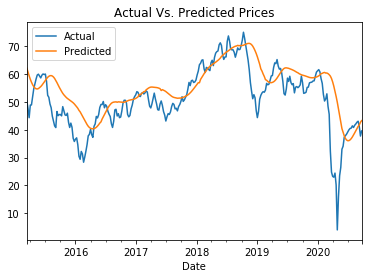

In [35]:
# Plot the real vs predicted prices as a line chart
futures.plot(title="Actual Vs. Predicted Prices")

## Predicate futures

In [77]:
import datetime

In [36]:
# 30 days historical prices
prices = oil_df.iloc[-window_size:, 0]

# predict price for the next 20 days
number_future_periods = 1
periods_unit = 'w'
count = 0
while count < number_future_periods:

    count = count + 1
    #print(count)
    
    fip = fip_score(prices)

    X_input = prices.to_list()
    X_input.append(fip)
    X_input = np.array(X_input)
    X_input = np.asmatrix(X_input)
    X_input = scaler.transform(X_input)
    X_input = X_input.reshape((X_input.shape[0], X_input.shape[1], 1))

    predicted = model.predict(X_input)
    predicted_prices = scaler.inverse_transform(predicted)

    next_date = ((prices.index[-1]+
                  pd.to_timedelta(number_future_periods, 
                                  unit=periods_unit))
                 .strftime(format= '%Y-%m-%d'))

    prices.loc[next_date] = predicted_prices[0,0]

    prices = prices.reset_index()
    prices.set_index('Date', inplace=True)
    prices = prices.iloc[-window_size:,0]


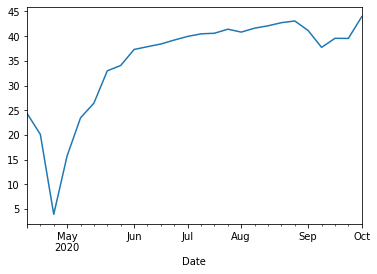

In [37]:
prices.plot()

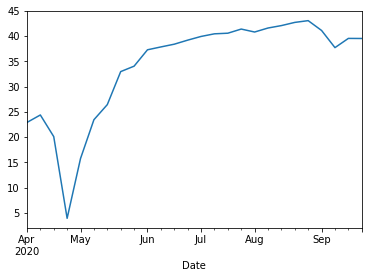

In [51]:
oil_df.iloc[-window_size:,0].plot()

In [42]:
type(oil_df.iloc[-window_size:,:])

pandas.core.frame.DataFrame

In [49]:
compare_df = pd.concat([prices.to_frame(),
          oil_df.iloc[-window_size:,0]],
          axis = 1,
          join = 'outer')

In [52]:
compare_df.columns = ['predicated', 'real']

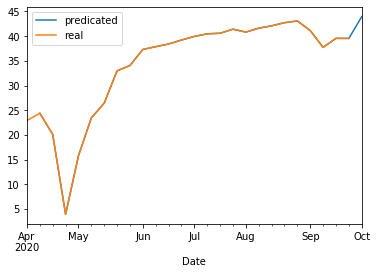

In [53]:
compare_df.plot()